In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [15]:
import json
rouge=json.load(open('data/text_summarization_rouge.json'))
# ro/uge = json.load(open('data/machine_translation_bleu.json'))
print(len(rouge["WatermarkLogitsProcessor(b'private key', Gamma_Reweight(gamma=1), PrevN_ContextCodeExtractor(n=5))"]['rouge1']))

11490


In [11]:
# nested dict to dataframe
def map_wp_str(wp_str):
    if "Delta" in wp_str:
        return "$\delta$"
    elif "Gamma" in wp_str:
        return "$\gamma$"
    else:
        return wp_str
df = pd.DataFrame.from_dict(
    [{"wp": map_wp_str(wp_str), "score": score_str, "value": score} 
     for wp_str in rouge for score_str in rouge[wp_str] for score in rouge[wp_str][score_str]],
                            )
df.head()

,wp,score,value
0,$\gamma$,rouge1,0.585366
1,$\gamma$,rouge1,0.508772
2,$\gamma$,rouge1,0.305085
3,$\gamma$,rouge1,0.216867
4,$\gamma$,rouge1,0.421053


<Axes: xlabel='wp', ylabel='value'>

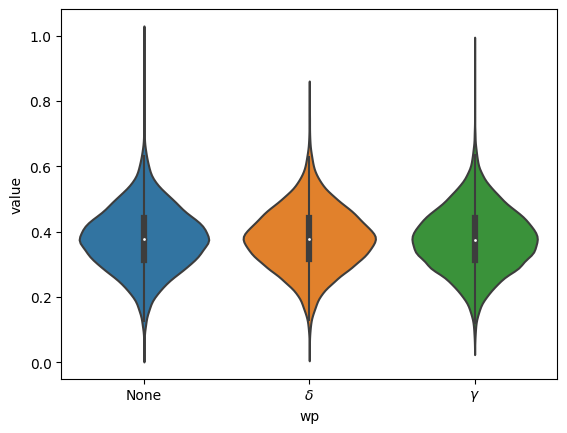

In [13]:
import seaborn as sns
sns.violinplot(data=df[df['score']=='rouge1'], x="wp", y="value",
order=["None", "$\delta$", "$\gamma$"])